# Lift and Gain Chart

http://www2.cs.uregina.ca/~dbd/cs831/notes/lift_chart/lift_chart.html

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./datasets/lift_and_gain.csv")
df.head()

,customer_name,height,age,actual_response
0,Alan,70,39,N
1,Bob,72,21,Y
2,Jessica,65,25,Y
3,Elizabeth,62,30,Y
4,Hilary,67,19,Y


In [3]:
df["response"] = df.actual_response.replace(["Y", "N"], [1, 0])
df.head()

,customer_name,height,age,actual_response,response
0,Alan,70,39,N,0
1,Bob,72,21,Y,1
2,Jessica,65,25,Y,1
3,Elizabeth,62,30,Y,1
4,Hilary,67,19,Y,1


In [4]:
# p(x) is 100 - age
df["p(x)"] = 100 - df.age
df.head()

,customer_name,height,age,actual_response,response,p(x)
0,Alan,70,39,N,0,61
1,Bob,72,21,Y,1,79
2,Jessica,65,25,Y,1,75
3,Elizabeth,62,30,Y,1,70
4,Hilary,67,19,Y,1,81


In [5]:
# Sort in descending probability.
df.sort_values("p(x)", ascending=False, inplace=True)

# Group into deciles (10 bins) with equal number of rows.
rows = df.shape[0]
df["decile"] = [int(10 * i / rows) + 1 for i in range(rows)]
df.head()

,customer_name,height,age,actual_response,response,p(x),decile
6,Alex,65,12,Y,1,88,1
12,Amy,69,13,N,0,87,1
4,Hilary,67,19,Y,1,81,2
10,Philip,75,20,Y,1,80,2
1,Bob,72,21,Y,1,79,3


In [6]:
df = df.groupby("decile").response.sum().reset_index()
df["baseline"] = df.decile * 10
df["cumulative_response"] = df.response.cumsum()
df["gain"] = df.cumulative_response / df.cumulative_response.max() * 100
df["lift"] = df.gain / df.baseline
df

,decile,response,baseline,cumulative_response,gain,lift
0,1,1,10,1,10.0,1.000000
1,2,2,20,3,30.0,1.500000
2,3,1,30,4,40.0,1.333333
3,4,2,40,6,60.0,1.500000
4,5,1,50,7,70.0,1.400000
5,6,1,60,8,80.0,1.333333
6,7,1,70,9,90.0,1.285714
7,8,0,80,9,90.0,1.125000
8,9,0,90,9,90.0,1.000000
9,10,1,100,10,100.0,1.000000


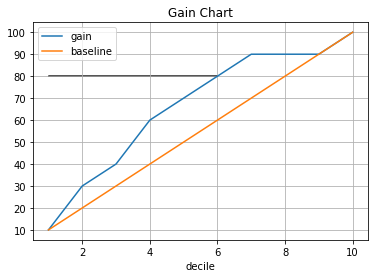

In [7]:
ax = df.plot(x="decile", y=["gain", "baseline"], yticks=df.baseline)
ax.grid()
ax.set_title("Gain Chart")
ax.arrow(6, 80, -5, 0)  # At decile 6, which is 12 customers, we have 80% response.

Text(0.5, 1.0, 'Lift Chart')

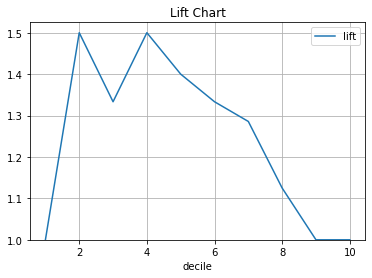

In [8]:
ax = df.plot(x="decile", y="lift")
ax.set_ylim(1)
ax.grid()
ax.set_title("Lift Chart")